# Exercises for Lecture 3 (Introduction to Scikit-Learn)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2022-01-08 18:39:33


Load in example data for exercises.

In [2]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [3]:
X_iris = iris.drop('species', axis='columns')
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y_iris = iris['species']
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

## Exercise 1: Supervised learning - classification

Consider Iris data-set  and predict species.

Split data into training and test sets (hint: [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) is a convenient scikit-learn function for this task).

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.5, random_state=1)

In [6]:
X_train.head() 

,sepal_length,sepal_width,petal_length,petal_width
74,6.4,2.9,4.3,1.3
116,6.5,3.0,5.5,1.8
93,5.0,2.3,3.3,1.0
100,6.3,3.3,6.0,2.5
89,5.5,2.5,4.0,1.3



Use a Gaussian Naive Bayes (`GaussianNB`) model to predict Iris species.  Then evaluate performance on test data.

(Hint: choose, instantiate, fit and predict.) 

See Scikit-Learn documentation on [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

Evaluate performance using simple [`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score).

(Do not set any priors.)

In [7]:
from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()                        # 2. instantiate model
model.fit(X_train, y_train)                 # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data

Evaluate performance on test data.

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.96

## Exercise 2: Unsupervised learning - dimensionality reduction

Reduce dimensionality of Iris data for visualisation or to discover structure.

Recall the original Iris data has four features.

In [9]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X_iris.shape

(150, 4)

Compute principle component analysis (`PCA`), with 2 components, and apply transform.  Plot data in PCA space. 

(Hint: choose, instantiate, fit and transform.)

See Scikit-Learn documentation on [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

See Seaborn documentation on [`lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html).

In [11]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions 

In [12]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
iris.head() 

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


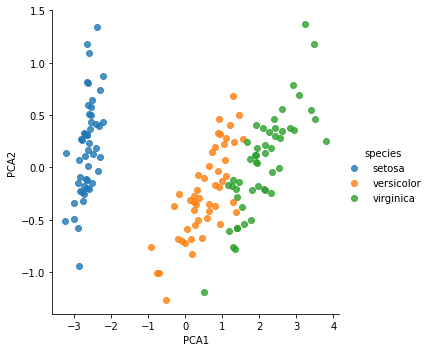

In [13]:
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

How well do you expect classification to perform using PCA components as features and why?

Very well since the different classes are well separated in PCA feature space.

## Exercise 3: Unsupervised learning - clustering

Attempt to find "groups" in Iris data without given labels or training data.


 
Cluster Iris data into 3 components using Gaussian Mixture Model (GMM).  Plot the 3 components separately in PCA space.

(Hint: choose, instantiate, fit and predict.)

See Scikit-Learn documentation on [`GaussianMixture`](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

In [14]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3)          # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                                # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                    # 4. Determine cluster labels

/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


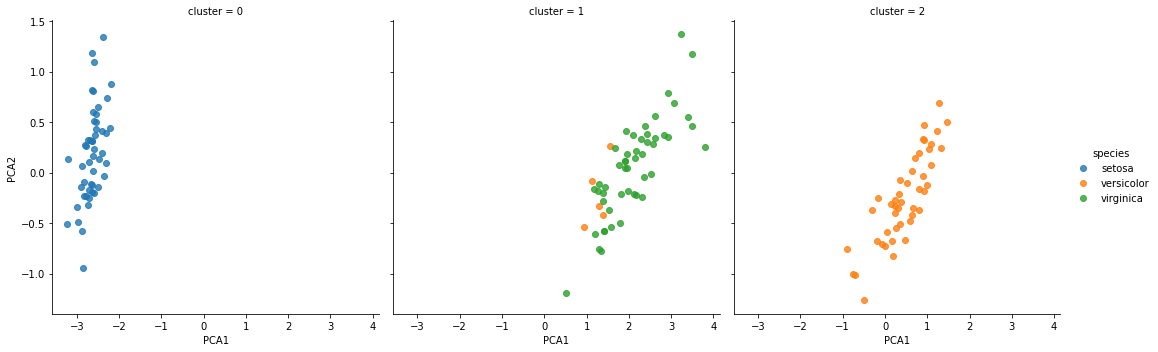

In [15]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

The GMM has done a reasonably good job of separating the different classes.  Setosa is perfectly separated in one cluster, while there remains some mixing between versicolor and viginica.

## Exercise 4: Classify hand-written digits 

Consider the classification of hand-written digits.

First load example Scikit-Learn data.

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

- Explore the data-set and plot some example images.
- Split the data-set into training and test sets.
- Train a logistic regression classifier, using a Newton Conjugate Gradient solver (`newton-cg`) with an $\ell_2$ penalty (see [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for further details).
- Compute the accuracy of predictions on the test set.

### Plot example images

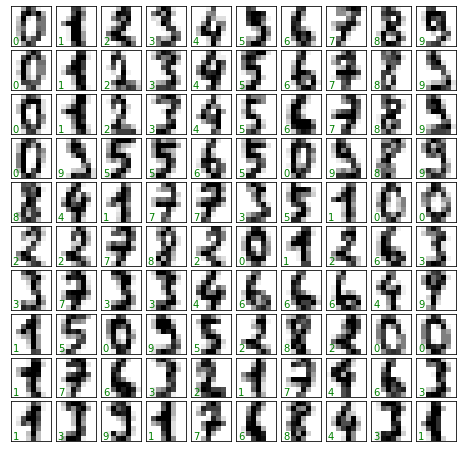

In [17]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

### Set up feature and target data

In [18]:
X = digits.data
X.shape

(1797, 64)

In [19]:
y = digits.target
y.shape

(1797,)

### Create training and test sets

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [21]:
Xtrain.shape, Xtest.shape

((1347, 64), (450, 64))

### Choose model, instantiate, fit and predict

In [22]:
from sklearn.linear_model import LogisticRegression          # 1. choose model class
model = LogisticRegression(solver='newton-cg', penalty='l2') # 2. instantiate model
model.fit(Xtrain, ytrain)                                    # 3. fit model to data
y_model = model.predict(Xtest)                               # 4. predict on new data

### Evaluate accuracy on test data

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9533333333333334